In [6]:

import pandas as pd
from pathlib import Path
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
# Read in CSV files
csv_path_1 = Path('Resources/healthcare-dataset-stroke-data.csv')
Health_Care = pd.read_csv(csv_path_1)

csv_path_2 = Path('Resources/Stroke Prediction.csv')
Stroke_Prediction = pd.read_csv(csv_path_2)

csv_path_3 = Path('Resources/stroke_prediction_dataset.csv')
Stroke_Prediction_2 = pd.read_csv(csv_path_3)

# Create a new DataFrame for Health_Care

Health_Care_df = pd.DataFrame(Health_Care)
Health_Care_df.head()

# Combine Stroke DataSets 1 & 2 into a single DataFrame

combined_stroke_data = pd.merge(Stroke_Prediction, Stroke_Prediction_2, how='outer', on='Patient ID')


# Display the Preview of the DataFrame

combined_stroke_data.head()

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [8]:
combined_stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  15000 non-null  int64  
 1   Patient Name_x              15000 non-null  object 
 2   Age_x                       15000 non-null  int64  
 3   Gender_x                    15000 non-null  object 
 4   Hypertension_x              15000 non-null  int64  
 5   Heart Disease_x             15000 non-null  int64  
 6   Marital Status_x            15000 non-null  object 
 7   Work Type_x                 15000 non-null  object 
 8   Residence Type_x            15000 non-null  object 
 9   Average Glucose Level_x     15000 non-null  float64
 10  Body Mass Index (BMI)_x     15000 non-null  float64
 11  Smoking Status_x            15000 non-null  object 
 12  Alcohol Intake_x            15000 non-null  object 
 13  Physical Activity_x         150

In [9]:
lowActivity = combined_stroke_data[combined_stroke_data["Physical Activity_y"]=="Low"]
modActivity = combined_stroke_data[combined_stroke_data["Physical Activity_y"]=="Moderate"]
highActivity = combined_stroke_data[combined_stroke_data["Physical Activity_y"]=="High"]

In [10]:
lowActivityStroke = lowActivity[lowActivity["Diagnosis_y"]=="Stroke"]
modActivityStroke = modActivity[modActivity["Diagnosis_y"]=="Stroke"]
highActivityStroke = highActivity[highActivity["Diagnosis_y"]=="Stroke"]
lowActivityStroke

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
14,54426,Tara Swaminathan,42,Male,0,1,Married,Self-employed,Rural,181.02,...,Frequent Drinker,Low,1,No,Paleo,2.58,170/102,"HDL: 70, LDL: 70","Dizziness, Blurred Vision, Weakness, Headache,...",Stroke
29,28610,Miraya Kaur,63,Male,0,1,Married,Never Worked,Urban,107.84,...,Never,Low,1,No,Paleo,4.69,123/63,"HDL: 67, LDL: 102",NaN,Stroke
37,94512,Anvi Salvi,23,Female,0,0,Single,Government Job,Rural,164.72,...,Social Drinker,Low,1,Yes,Gluten-Free,7.86,148/74,"HDL: 30, LDL: 62","Blurred Vision, Seizures, Weakness",Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14951,3539,Hiran Bhatnagar,37,Female,1,0,Divorced,Private,Rural,143.12,...,Never,Low,1,Yes,Keto,8.78,138/61,"HDL: 35, LDL: 167","Dizziness, Numbness",Stroke
14963,46872,Rasha Chowdhury,69,Female,1,1,Married,Self-employed,Urban,133.95,...,Frequent Drinker,Low,0,No,Vegetarian,4.51,112/89,"HDL: 43, LDL: 181","Loss of Balance, Difficulty Speaking",Stroke
14977,63196,Manikya Sundaram,45,Male,0,0,Divorced,Self-employed,Urban,191.63,...,Rarely,Low,0,Yes,Pescatarian,1.67,109/72,"HDL: 69, LDL: 92","Headache, Difficulty Speaking, Difficulty Spea...",Stroke
14981,12323,Pari Ravi,25,Male,0,0,Single,Private,Rural,77.64,...,Frequent Drinker,Low,0,Yes,Paleo,2.69,135/66,"HDL: 58, LDL: 161","Blurred Vision, Headache, Severe Fatigue, Loss...",Stroke


In [11]:
lowActivityCount = len(lowActivity)
modActivityCount = len(modActivity)
highActivityCount = len(highActivity)

lowActivityCountStroke = len(lowActivityStroke)
modActivityCountStroke = len(modActivityStroke)
highActivityCountStroke = len(highActivityStroke)

lowProp = lowActivityCountStroke/lowActivityCount
modProp = modActivityCountStroke / modActivityCount
highProp = highActivityCountStroke /highActivityCount

In [12]:
lowProp

0.5

In [13]:
modProp

0.4991996798719488

In [14]:
highProp

0.4944664031620553

In [15]:
strokeProp = pd.DataFrame({
    "Stroke": [highProp, modProp, lowProp],
    "No Stroke": [1- highProp,1- modProp,1- lowProp]
}, index=["High","Moderate","Low"])

In [16]:
strokeCount = pd.DataFrame({
    "Stroke": [highActivityCountStroke, modActivityCountStroke, lowActivityCountStroke ],
    "Total People": [highActivityCount,modActivityCount,lowActivityCount]
}, index=["High","Moderate","Low"])

In [17]:
strokeProp

,Stroke,No Stroke
High,0.494466,0.505534
Moderate,0.499200,0.500800
Low,0.500000,0.500000


In [18]:
strokeCount

,Stroke,Total People
High,2502,5060
Moderate,2495,4998
Low,2471,4942


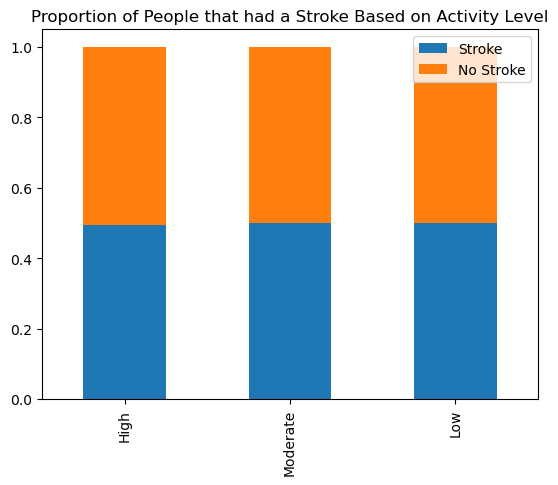

In [19]:
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
strokeProp.plot(kind='bar', stacked=True, title="Proportion of People that had a Stroke Based on Activity Level")

plt.savefig("activityLevelStroke.png")
plt.show()
